In [1]:
%matplotlib inline

import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
#These are our training images:

Using TensorFlow backend.
c:\users\jsjs1\ven\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\jsjs1\ven\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\jsjs1\ven\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\jsjs1\ven\tensorflow\lib\site-packages\tensorflow\python

In [2]:
import keras
print(keras.__version__)

2.3.0


In [3]:
#Circles

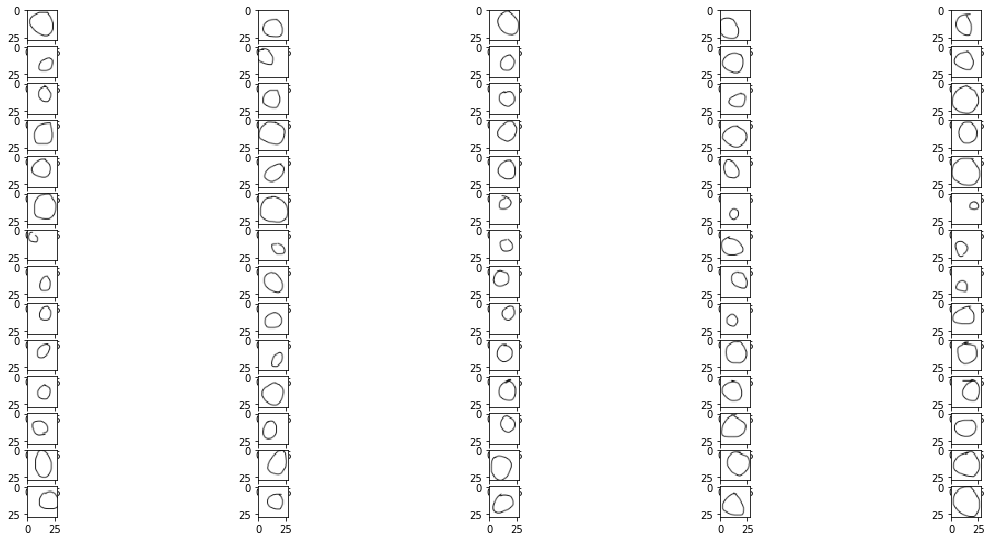

In [4]:
images = []
for img_path in glob.glob('training_set/circles/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [5]:
#Squares

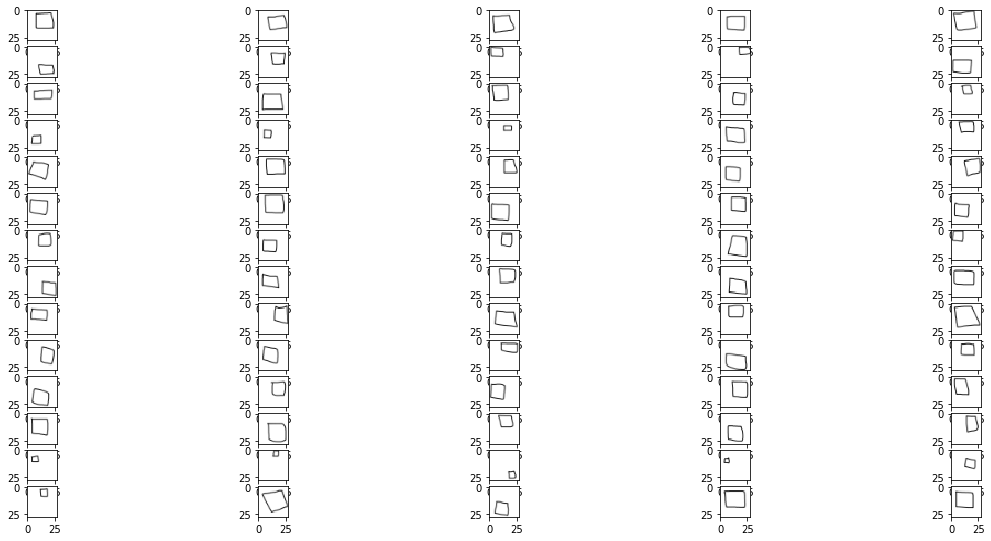

In [6]:
images = []
for img_path in glob.glob('training_set/squares/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

# Triangles

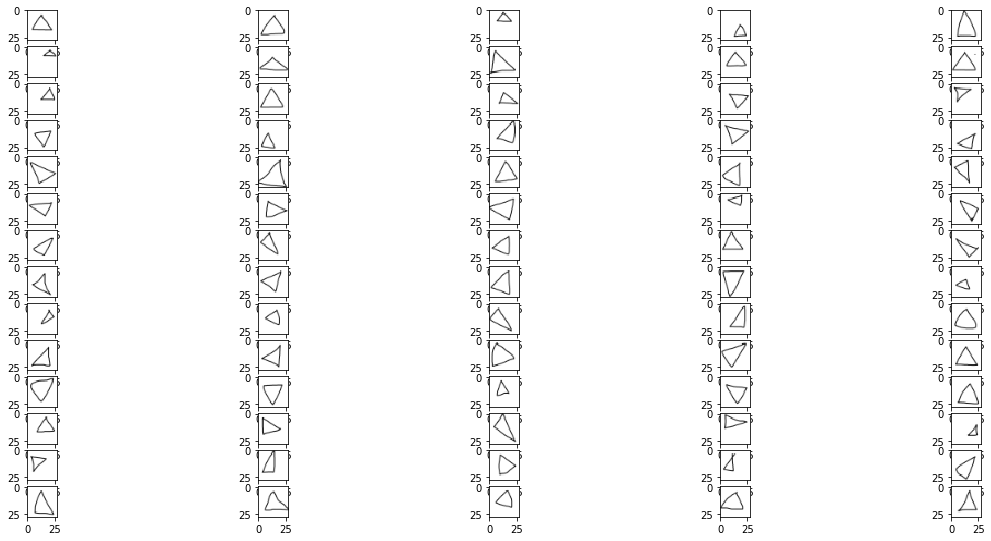

In [7]:
images = []
for img_path in glob.glob('training_set/triangles/*.png'):
    images.append(mpimg.imread(img_path))
    
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

# star

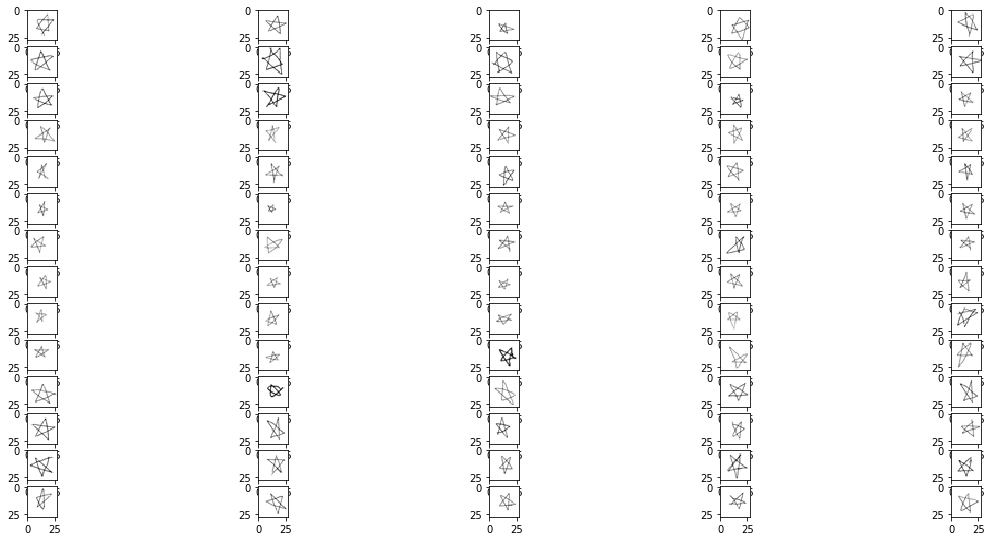

In [8]:
images = []
for img_path in glob.glob('training_set/star/*.png'):
    images.append(mpimg.imread(img_path))
    
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [9]:
img = im.imread('training_set/squares/drawing(40).png')
img.shape

(28, 28, 3)

In [10]:
classifier = Sequential()

In [11]:
classifier.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25

# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5)) # antes era 0.25

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(Dropout(0.5)) 
classifier.add(Dense(units = 4, activation = 'softmax'))

In [12]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)         

In [13]:
classifier.compile(optimizer = 'rmsprop',
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

In [14]:
!dir training_set

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: DC34-BD16

 C:\Users\jsjs1\DL_Study\training_set 디렉터리

2019-09-30  오후 07:37    <DIR>          .
2019-09-30  오후 07:37    <DIR>          ..
2019-09-30  오후 07:37    <DIR>          circles
2019-09-30  오후 07:37    <DIR>          squares
2019-09-30  오후 07:37    <DIR>          star
2019-09-30  오후 07:37    <DIR>          triangles
               0개 파일                   0 바이트
               6개 디렉터리  55,481,200,640 바이트 남음


In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (28, 28),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 280 images belonging to 4 classes.


In [16]:
test_set = test_datagen.flow_from_directory('testing_set',
                                            target_size = (28, 28),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 115 images belonging to 4 classes.


In [17]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

In [18]:
history = classifier.fit_generator(training_set,
                                   steps_per_epoch = 100,
                                   epochs = 30, #지원이는 50개로 함, 그랬더니 그래프가 좀 다르게 나왔다고 함 #50개도 돌려보기
                                   callbacks=[checkpointer],
                                   validation_data = test_set,
                                   validation_steps = 50)


Epoch 1/30
100/100 [==============================] - 9s 90ms/step - loss: 1.3933 - accuracy: 0.2333 - val_loss: 1.3828 - val_accuracy: 0.2673
Epoch 2/30
  2/100 [..............................] - ETA: 7s - loss: 1.3908 - accuracy: 0.1250

c:\users\jsjs1\ven\tensorflow\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


100/100 [==============================] - 8s 82ms/step - loss: 1.3876 - accuracy: 0.2442 - val_loss: 1.3721 - val_accuracy: 0.3767
Epoch 3/30
100/100 [==============================] - 8s 84ms/step - loss: 1.1964 - accuracy: 0.4749 - val_loss: 0.8615 - val_accuracy: 0.6704
Epoch 4/30
100/100 [==============================] - 8s 85ms/step - loss: 0.8768 - accuracy: 0.6731 - val_loss: 0.7490 - val_accuracy: 0.7362
Epoch 5/30
100/100 [==============================] - 8s 85ms/step - loss: 0.6564 - accuracy: 0.7519 - val_loss: 1.0591 - val_accuracy: 0.5485
Epoch 6/30
100/100 [==============================] - 10s 95ms/step - loss: 0.5052 - accuracy: 0.8083 - val_loss: 0.2299 - val_accuracy: 0.8560
Epoch 7/30
100/100 [==============================] - 9s 90ms/step - loss: 0.4071 - accuracy: 0.8524 - val_loss: 0.4560 - val_accuracy: 0.8629
Epoch 8/30
100/100 [==============================] - 9s 89ms/step - loss: 0.3201 - accuracy: 0.8942 - val_loss: 0.2374 - val_accuracy: 0.8463
Epoch 9/3

In [19]:
print(history.history)

{'val_loss': [1.3827543258666992, 1.3720886707305908, 0.8614771962165833, 0.7489528656005859, 1.0590804815292358, 0.22994764149188995, 0.45597633719444275, 0.2374372035264969, 0.7884113192558289, 0.15921567380428314, 0.11298606544733047, 1.300530195236206, 0.33088651299476624, 0.15342408418655396, 0.44298264384269714, 2.381495714187622, 0.07248570770025253, 0.02390298619866371, 0.23141731321811676, 1.2469227313995361, 0.19624868035316467, 0.25108444690704346, 0.0017713934648782015, 0.0, 8.631629316369072e-05, 0.0015346650034189224, 0.0016910878475755453, 0.0, 0.15802006423473358, 1.6766650676727295], 'val_accuracy': [0.26731303334236145, 0.3767313063144684, 0.6703600883483887, 0.736248254776001, 0.5484764575958252, 0.8559556603431702, 0.8628808856010437, 0.8462623357772827, 0.8407202363014221, 0.9390581846237183, 0.9376731514930725, 0.7686883211135864, 0.9196676015853882, 0.9321329593658447, 0.880886435508728, 0.8448519110679626, 0.940443217754364, 0.9362881183624268, 0.945983350276947

In [20]:
history.history['accuracy']

[0.23333333,
 0.24420103,
 0.47487113,
 0.6730769,
 0.751933,
 0.80833334,
 0.85244846,
 0.8942308,
 0.9097938,
 0.9275641,
 0.94072163,
 0.93846154,
 0.9536083,
 0.9503866,
 0.97307694,
 0.9729381,
 0.97487116,
 0.9705128,
 0.9755155,
 0.98333335,
 0.98002577,
 0.97680414,
 0.9737179,
 0.9864691,
 0.9789541,
 0.9787371,
 0.9838917,
 0.98333335,
 0.9871134,
 0.98518044]

In [21]:
history.history['val_accuracy']


[0.26731303334236145,
 0.3767313063144684,
 0.6703600883483887,
 0.736248254776001,
 0.5484764575958252,
 0.8559556603431702,
 0.8628808856010437,
 0.8462623357772827,
 0.8407202363014221,
 0.9390581846237183,
 0.9376731514930725,
 0.7686883211135864,
 0.9196676015853882,
 0.9321329593658447,
 0.880886435508728,
 0.8448519110679626,
 0.940443217754364,
 0.9362881183624268,
 0.945983350276947,
 0.9407616257667542,
 0.9293628931045532,
 0.9473684430122375,
 0.9473684430122375,
 0.9478138089179993,
 0.9584487676620483,
 0.945983350276947,
 0.945983350276947,
 0.9308885931968689,
 0.945983350276947,
 0.8504155278205872]

In [22]:
classifier.load_weights('best_weights.hdf5')

In [23]:
classifier.save('shapes_cnn.h5')

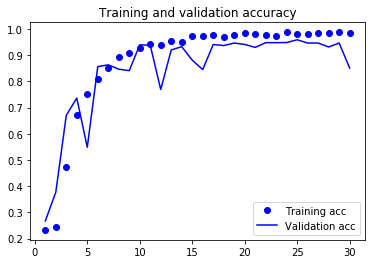

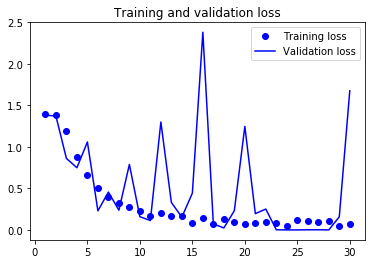

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
!dir testing_set\\triangle

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: DC34-BD16

 C:\Users\jsjs1\DL_Study\testing_set\triangle 디렉터리

2019-09-30  오후 07:37    <DIR>          .
2019-09-30  오후 07:37    <DIR>          ..
2018-06-01  오후 04:31               514 drawing(100).png
2018-06-01  오후 04:29               625 drawing(71).png
2018-06-01  오후 04:29               575 drawing(72).png
2018-06-01  오후 04:29               627 drawing(73).png
2018-06-01  오후 04:29               556 drawing(74).png
2018-06-01  오후 04:29               395 drawing(75).png
2018-06-01  오후 04:29               546 drawing(76).png
2018-06-01  오후 04:29               552 drawing(77).png
2018-06-01  오후 04:29               593 drawing(78).png
2018-06-01  오후 04:29               550 drawing(79).png
2018-06-01  오후 04:30               568 drawing(80).png
2018-06-01  오후 04:30               480 drawing(81).png
2018-06-01  오후 04:30               452 drawing(82).png
2018-06-01  오후 04:30               511 drawing(83).png
2018-06-01  오후 04:30               555 drawing(8

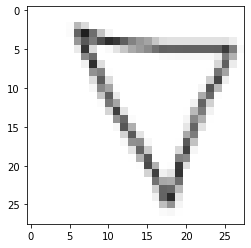

(1, 28, 28, 3)


In [26]:
img_path = 'testing_set/triangle/drawing(71).png'
from keras.preprocessing import image

img = image.load_img(img_path, target_size=(28, 28))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)

In [27]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = classifier.predict_classes(images, batch_size=10)
print("Predicted class is:",classes)

Predicted class is: [3]


In [28]:
layer_outputs = [layer.output for layer in classifier.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [29]:
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation

In [30]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 28, 28, 32)


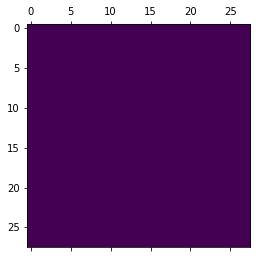

In [31]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

c:\users\jsjs1\ven\tensorflow\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


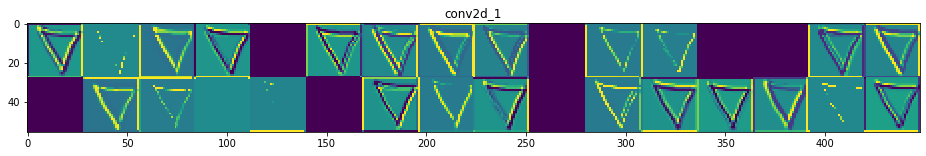

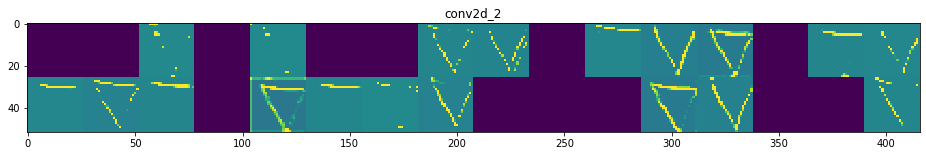

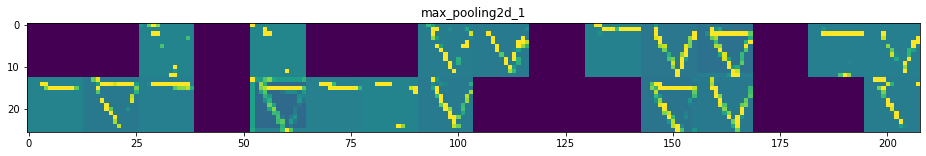

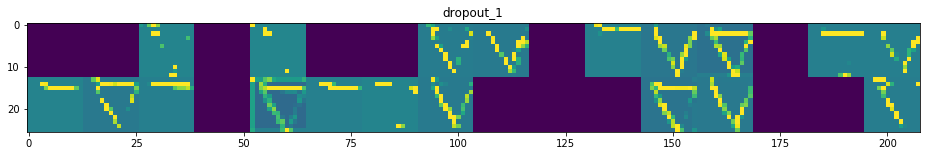

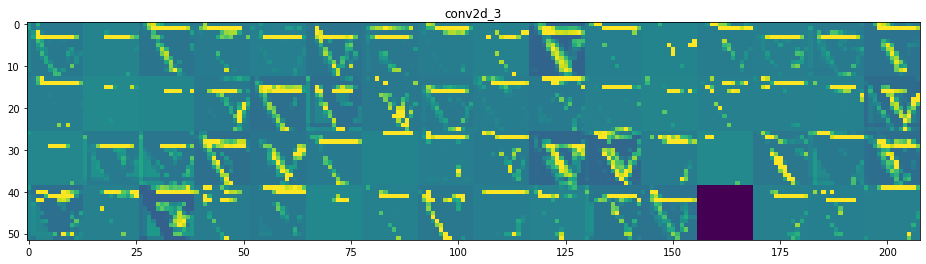

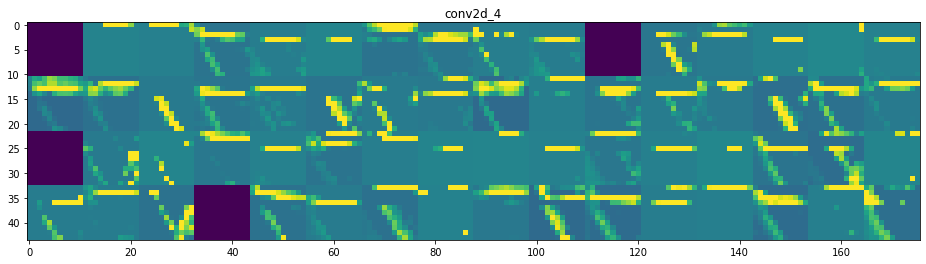

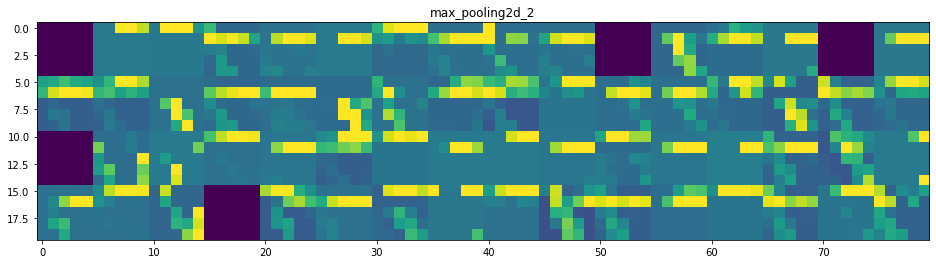

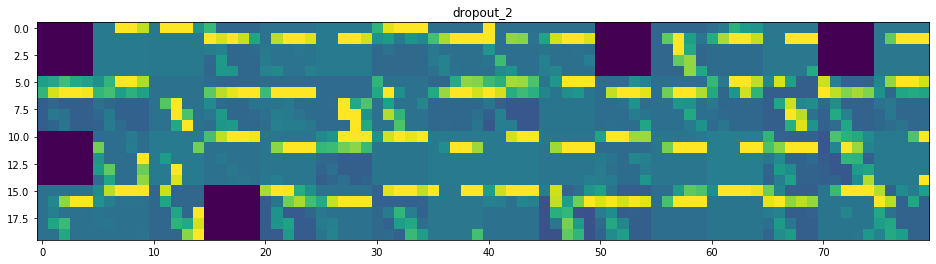

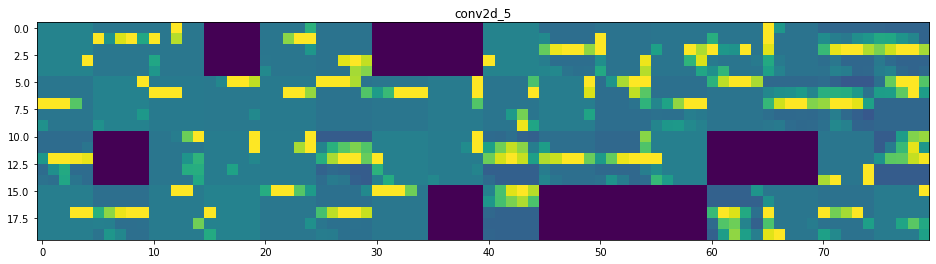

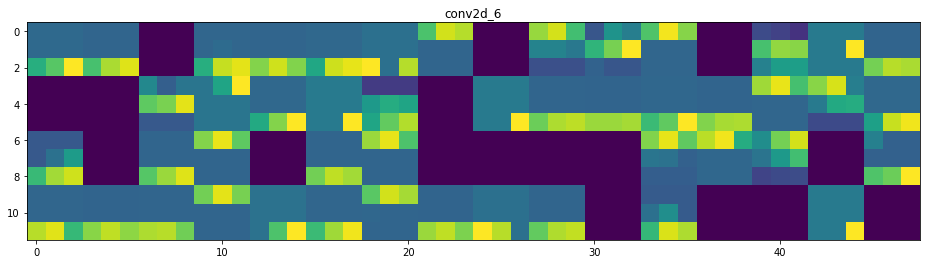

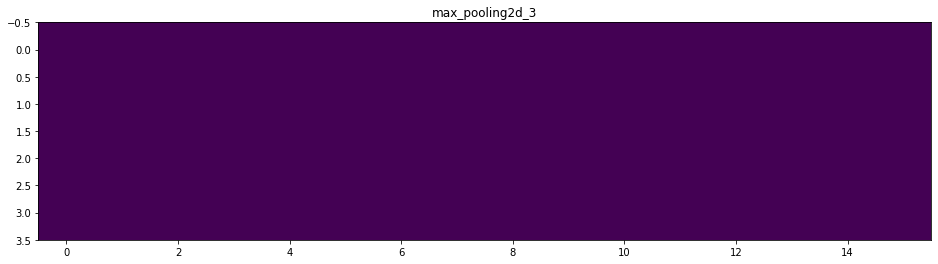

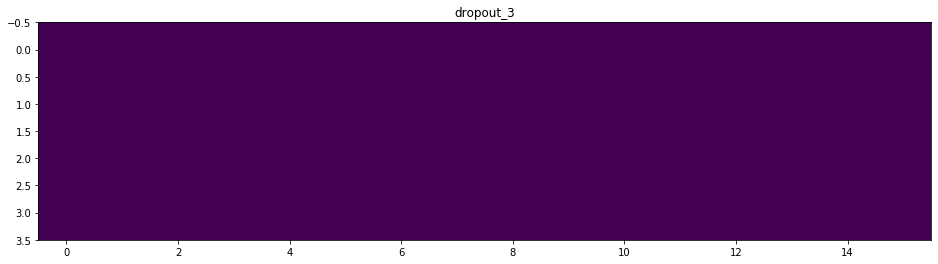

In [32]:
layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')